In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    # 分类决策树
from sklearn.tree import DecisionTreeRegressor     # 回归决策树
from sklearn.model_selection import GridSearchCV     # 网格交叉分布
from sklearn.pipeline import Pipeline     # 管道
from sklearn.feature_selection import SelectKBest    # 特征选择
from sklearn.feature_selection import chi2     # 卡方系数
from sklearn.preprocessing import MinMaxScaler    # 归一化
from sklearn.decomposition import PCA    # 降维
from sklearn.preprocessing import StandardScaler

读取数据

In [2]:
df = pd.read_csv('./datas/boston_housing.data', header=None)
data = df.apply(lambda x: pd.Series(x[0].split()), axis=1).astype('float64')
del df
print('数据总量：%d，数据维度：%d' % data.shape)

数据总量：506，数据维度：14


预处理，提取特征和目标值

In [3]:
data.dropna(how='any', inplace=True)
print('处理后的数据总量：%d，数据维度：%d' % data.shape)
x = data.loc[:, :12]
y = data.loc[:, 13]

处理后的数据总量：506，数据维度：14


数据划分

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

数据标准化处理

In [5]:
ss = MinMaxScaler()    # 归一化

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

特征选择

In [6]:
# 使用卡方系数匹配选择特真
# ch2 = SelectKBest(chi2, k=5)

# x_train = ch2.fit_transform(x_train, y_train)
# x_test = ch2.transform(x_test)
# print(ch2.get_support(indices=True))


# 降维处理
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train, y_train)
x_test = pca.transform(x_test)

构建模型

In [7]:
deci = DecisionTreeRegressor(criterion='mse', max_depth=7)
deci.fit(x_train, y_train)    # 模型训练
y_predict = deci.predict(x_test)

画图😻

In [8]:
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

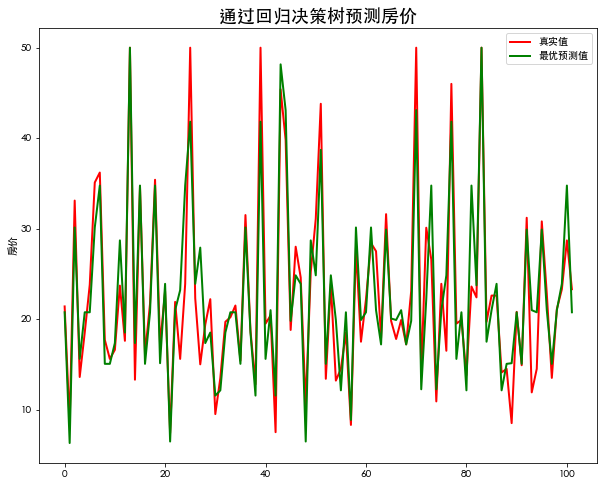

In [36]:
x_len = range(len(y_predict))
plt.figure(facecolor='w', figsize=(10, 8))

plt.plot(x_len, y_test, 'r', linewidth=2, label='真实值')
# plt.plot(x_len, y_predict, 'g', linewidth=2, label='预测值')
plt.plot(x_len, y3, 'g', linewidth=2, label='最优预测值')
plt.title('通过回归决策树预测房价', fontsize=18)
plt.ylabel('房价')
plt.legend()

plt.show()

模型参数优化

In [21]:
pipes = [
    Pipeline([
        ('mms', MinMaxScaler()),
        ('pca', PCA()),
        ('decision', DecisionTreeRegressor(criterion='mse'))
    ]),
    Pipeline([
        ('mms', MinMaxScaler()),
        ('decision', DecisionTreeRegressor(criterion='mse'))
    ]),
    Pipeline([
        ('decision', DecisionTreeRegressor(criterion='mse'))
    ])
]

parameters = [
    {
        'pca__n_components': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'decision__max_depth': np.linspace(4, 25, 22).astype(np.int8)
    },
    {
        'decision__max_depth': np.linspace(4, 25, 22).astype(np.int8)
    },
    {
        'decision__max_depth': np.linspace(4, 25, 22).astype(np.int8)
    }
]

In [23]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=9)

for t in range(3):
    gscv = GridSearchCV(pipes[t], param_grid=parameters[t], cv=3)
    gscv.fit(x_train2, y_train2)
    print (t, "score值:", gscv.best_score_, "最优参数列表:", gscv.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0 score值: 0.42381256428330044 最优参数列表: {'decision__max_depth': 8, 'pca__n_components': 0.9}
1 score值: 0.7513280207935966 最优参数列表: {'decision__max_depth': 25}
2 score值: 0.7682864470856968 最优参数列表: {'decision__max_depth': 7}


使用三个最优参数查看正确率

In [33]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.2, random_state=9)
# 标准化
mms = MinMaxScaler()
x0_train3 = mms.fit_transform(x_train3)
x0_test3 = mms.transform(x_test3)
# 降维
pca0 = PCA(n_components=0.9)
x0_train3 = pca0.fit_transform(x0_train3, y_train3)
x0_test3 = pca0.transform(x0_test3)
# 模型构建、训练
decis0 = DecisionTreeRegressor(criterion='mse', max_depth=8)
decis0.fit(x0_train3, y_train3)
print('第一种最优参数的准确率为：', decis0.score(x0_test3, y_test3))

# 第二种算法
# 标准化
mms = MinMaxScaler()
x1_train3 = mms.fit_transform(x_train3)
x1_test3 = mms.transform(x_test3)

decis1 = DecisionTreeRegressor(criterion='mse', max_depth=8)
decis1.fit(x1_train3, y_train3)
print('第二种最优参数的准确率为：', decis1.score(x1_test3, y_test3))

# 第三组参数
decis2 = DecisionTreeRegressor(criterion='mse', max_depth=7)
decis2.fit(x_train3, y_train3)
print('第三种最优参数的准确率为：', decis2.score(x_test3, y_test3))

第一种最优参数的准确率为： 0.7414650461522354
第二种最优参数的准确率为： 0.8288707798782671
第三种最优参数的准确率为： 0.8477612039490843


In [34]:
y3 = decis2.predict(x_test3)

In [37]:
deci.score(x_test, y_test)

0.754600973074411